<a href="https://colab.research.google.com/github/ishan53/Sparks-Intern/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Ishan Singhal

Task-2 : Prediction using Unsupervised ML

Objective : Load the Iris dataset and predict the optimum number of clusters and represent it visually


## Importing Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Impoting Dataset

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
iris_ds = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_ds.head(10) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Visualising Data

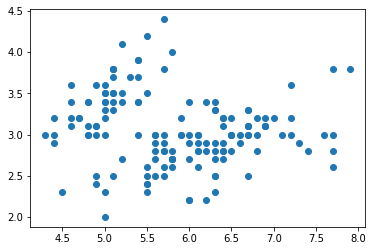

In [39]:
plt.scatter(iris_ds['sepal length (cm)'],iris_ds['sepal width (cm)'])

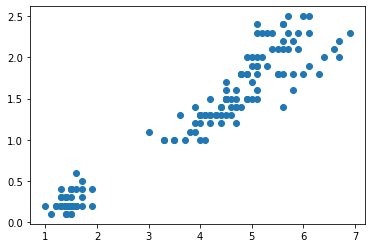

In [40]:
plt.scatter(iris_ds['petal length (cm)'],iris_ds['petal width (cm)'])

#### Importing model and finding the optimum number of clusters for K Means

In [41]:
from sklearn.cluster import KMeans

arr=[]
k_range=range(1,10)
for i in k_range:
    k_model = KMeans(n_clusters=i)
    k_model.fit(iris_ds)
    arr.append(k_model.inertia_)
    


#### Elbow plot

Text(0.5, 0, 'Value of K')

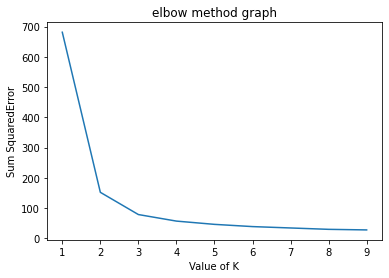

In [42]:
plt.plot(k_range,arr)
plt.title('elbow method graph')
plt.ylabel('Sum SquaredError')
plt.xlabel('Value of K')

#### The above graph depicts that elbow point is 3


In [43]:
# for K=3
model=KMeans(n_clusters=3)
model.fit(iris_ds)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
y_pred=model.predict(iris_ds)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [45]:
iris_ds['clusters']=y_pred
ds0 = iris_ds[iris_ds.clusters==0]
ds1 = iris_ds[iris_ds.clusters==1]
ds2 = iris_ds[iris_ds.clusters==2]
kc = model.cluster_centers_

### Visualization

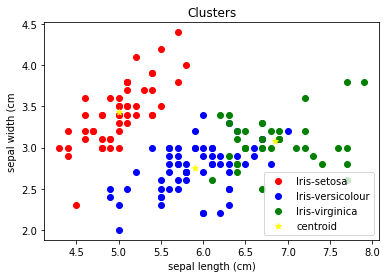

In [46]:
# visualising the clusters on Petal Length and Petal Width
plt.scatter(ds0['sepal length (cm)'],ds0['sepal width (cm)'],c='r',label = 'Iris-setosa')
plt.scatter(ds1['sepal length (cm)'],ds1['sepal width (cm)'],c='b',label = 'Iris-versicolour')
plt.scatter(ds2['sepal length (cm)'],ds2['sepal width (cm)'],c='g',label = 'Iris-virginica')
plt.scatter(kc[:,0],kc[:,1],c='yellow',marker='*',label = 'centroid')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm')
plt.title('Clusters')
plt.legend()